# Confidence metrics plotting for AlphaFold + EVcouplings predictions
- Make charts that show average pLDDT, pTM with increasing number of ald chains in complex
- Make a bar chart that shows how the proportion of satisfied (<5-8 Angstrom) multimeric couplings increases going from monomer to hexamer, suggesting that a CONFIDENT Alphafold prediction need not be complete, and that satisfying couplings can help to build a more complete model

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import pandas as pd
import numpy as np
import string

# enable svg export with editable text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

def jsonload(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)  
        PAE = np.array(metrics_json['pae'])
        plddt = metrics_json['plddt']
        ptm = metrics_json['ptm']
        if "iptm" in metrics_json:
            iptm = metrics_json['iptm']
        else:
            iptm = 0
        return PAE, plddt, ptm, iptm
    
def jsonload_iptm_ptm(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)
        iptm_ptm = metrics_json["iptm+ptm"]
        return iptm_ptm

# Load metrics into an indexable dataframe

In [2]:
# path to the JSON files for alphafold prediction
folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/GerA/"
paths = [
    "GerAA_monomer/result_model_5_ptm_pred_0.json",
    "GerAA_dimer/result_model_1_multimer_v2_pred_1.json",
    "GerAA_trimer/result_model_3_multimer_v2_pred_0.json",
    "GerAA_tetramer/result_model_1_multimer_v2_pred_1.json",
    "GerAA_pentamer/result_model_1_multimer_v2_pred_1.json",
    "GerAA_hexamer_full/result_model_1_multimer_v2_pred_1.json",
]

PAE, plddt, ptm, iptm, name = ([None]*len(paths) for val in range(5))
metrics = pd.DataFrame({'# GerAA chains':name,"pLDDT":plddt,"pTM":ptm,'ipTM':iptm,"PAE": PAE}) # save numpy arrays in dataframe

for i in range(len(paths)):
    inpath = folder+paths[i]
    metrics['PAE'][i], metrics['pLDDT'][i], metrics['pTM'][i], metrics['ipTM'][i] = jsonload(inpath)
    metrics['# GerAA chains'][i] = \
    paths[i].split('/')[0].split('_')[1] # give oligomeric state information in dataframe
    
metrics = metrics.set_index('# GerAA chains')

folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/GerA/"
paths = [
    "GerAA_dimer/ranking_debug.json",
    "GerAA_trimer/ranking_debug.json",
    "GerAA_tetramer/ranking_debug.json",
    "GerAA_pentamer/ranking_debug.json",
    "GerAA_hexamer_full/ranking_debug.json", 
]

paths_monomer = [
    "GerAA_monomer/result_model_1_ptm_pred_0.json",
    "GerAA_monomer/result_model_2_ptm_pred_0.json", 
    "GerAA_monomer/result_model_3_ptm_pred_0.json", 
    "GerAA_monomer/result_model_4_ptm_pred_0.json", 
    "GerAA_monomer/result_model_5_ptm_pred_0.json", 
]

ptm_iptm, best_ptm_iptm, mean_ptm_iptm, std_mean_ptm_iptm, name = ([None]*(len(paths)+1) for val in range(5))
metrics_ptm_iptm = pd.DataFrame({'# GerAA chains':name,'ipTM+pTM':ptm_iptm, 'Highest ipTM+pTM':best_ptm_iptm, 'Average ipTM+pTM':mean_ptm_iptm, 'Standard error ipTM+pTM':std_mean_ptm_iptm}) # save numpy arrays in dataframe

# monomer first
metrics_monomer = []
for i in range(len(paths_monomer)):
    inpath = folder+paths_monomer[i]
    pTM_monomer = jsonload(inpath)[2]
    metrics_monomer.append(pTM_monomer)
    
metrics_ptm_iptm ['# GerAA chains'][0] = 'monomer'
metrics_ptm_iptm ['ipTM+pTM'][0]=metrics_monomer
metrics_ptm_iptm ['Highest ipTM+pTM'][0]=max(metrics_monomer)
metrics_ptm_iptm ['Average ipTM+pTM'][0]=np.mean(metrics_monomer)
metrics_ptm_iptm ['Standard error ipTM+pTM'][0]=np.std(metrics_monomer,ddof=1)

# complexes 
for i in range(len(paths)):
    inpath = folder+paths[i]
    i = i + 1
    dict_vals = jsonload_iptm_ptm(inpath)
    metrics_ptm_iptm ['ipTM+pTM'][i]=list(dict_vals.values())
    metrics_ptm_iptm ['Highest ipTM+pTM'][i]=max(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Average ipTM+pTM'][i]=np.mean(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Standard error ipTM+pTM'][i]=np.std(metrics_ptm_iptm ['ipTM+pTM'][i],ddof=1)
    metrics_ptm_iptm ['# GerAA chains'][i] = \
    paths[i-1].split('/')[0].split('_')[1] # give oligomeric state information in dataframe
    
metrics_ptm_iptm = metrics_ptm_iptm.set_index('# GerAA chains')
metrics = metrics.join(metrics_ptm_iptm.iloc[:,0:5])
metrics

,pLDDT,pTM,ipTM,PAE,ipTM+pTM,Highest ipTM+pTM,Average ipTM+pTM,Standard error ipTM+pTM
# GerAA chains,,,,,,,,
monomer,"[52.64, 57.33, 64.49, 80.3, 85.49, 89.96, 89.2...",0.856807,0,"[[0.25, 1.26, 3.29, 5.62, 7.9, 10.34, 13.16, 1...","[0.827417391323596, 0.8560876129210704, 0.8496...",0.856807,0.843211,0.015268
dimer,"[37.98, 48.01, 61.88, 76.2, 85.01, 86.8, 87.87...",0.803611,0.770451,"[[0.75, 1.85, 3.68, 7.09, 8.84, 10.61, 13.13, ...","[0.7447474119867147, 0.777083030913321, 0.5330...",0.777083,0.654906,0.094331
trimer,"[37.05, 44.89, 59.26, 76.48, 86.36, 88.07, 88....",0.878678,0.862891,"[[0.75, 1.95, 4.54, 6.86, 8.78, 11.03, 13.41, ...","[0.8018782956542615, 0.7760875839053889, 0.844...",0.866049,0.779144,0.053496
tetramer,"[36.99, 47.27, 66.18, 78.96, 88.03, 89.71, 88....",0.880553,0.865304,"[[0.75, 1.97, 4.24, 6.96, 8.54, 10.0, 12.36, 1...","[0.8530232289480145, 0.8683537839133727, 0.867...",0.868354,0.830759,0.030349
pentamer,"[38.64, 49.16, 67.2, 78.57, 86.77, 88.48, 87.6...",0.887528,0.874834,"[[0.75, 1.99, 4.27, 6.75, 8.36, 9.62, 11.69, 1...","[0.8730995065584799, 0.8773725971436159, 0.856...",0.877373,0.848457,0.024733
hexamer,"[36.98, 47.72, 65.32, 75.43, 84.75, 88.44, 86....",0.842035,0.825121,"[[0.75, 2.02, 4.33, 6.86, 8.67, 9.89, 11.89, 1...","[0.82825, 0.8285, 0.82608, 0.80182, 0.79523, 0...",0.8285,0.796495,0.028814


# Plot the metrics

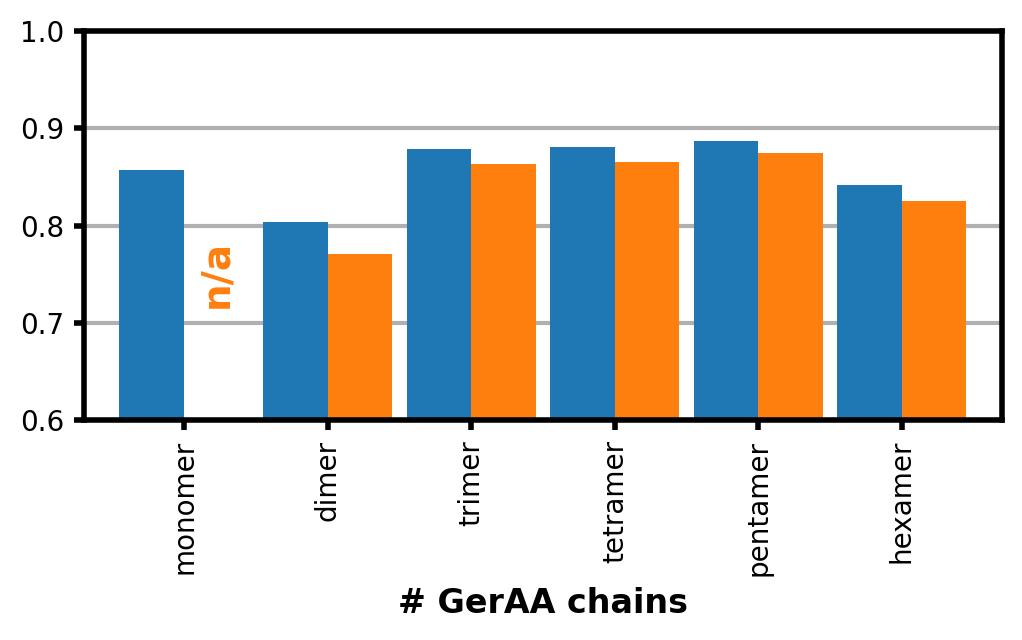

In [3]:
ax = metrics[['pTM','ipTM']].plot.bar(rot = 90, width = 0.9)
fig = plt.gcf()

fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

ax.yaxis.grid(True, which='major', linewidth = 1.5)

plt.ylim((0.6, 1.0))

ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          ax.patches[6].get_x() + ax.patches[0].get_width() / 2,
          0.75,
          # show n/a when no iptm available.
          str('n/a'),
          # Center the labels and style them a bit.
          ha='center',
          va='center',
          color='tab:orange',
          weight = 'bold',
          rotation=90,
          size=14
    )

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
ax.get_legend().remove()

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [18]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pTM+ipTM (weighted) of all models

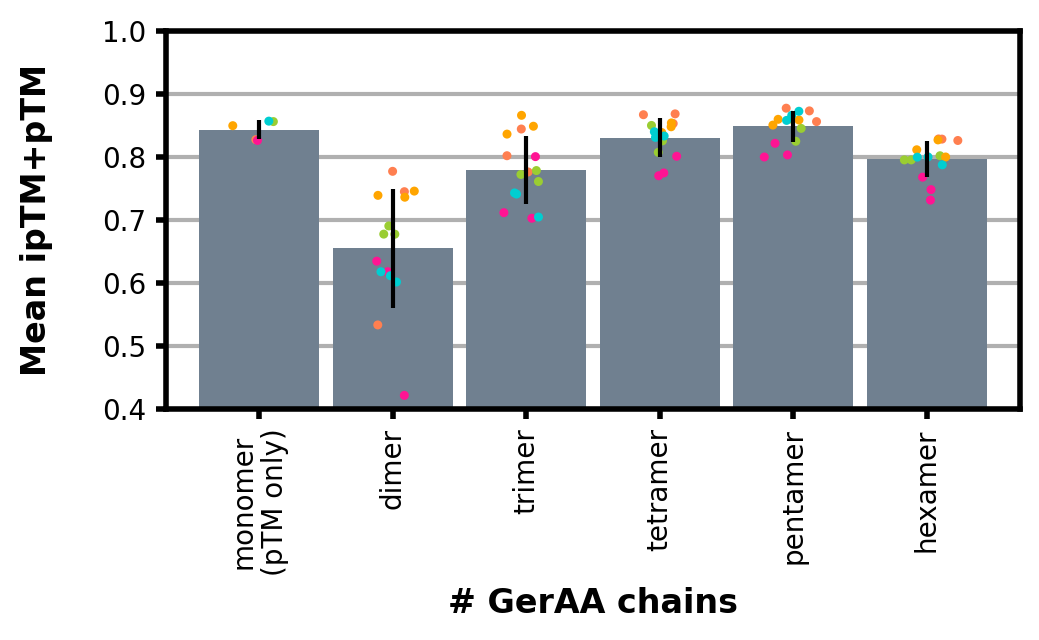

In [22]:
ax = metrics['Average ipTM+pTM'].plot(kind='bar', yerr=metrics['Standard error ipTM+pTM'], rot = 90, width = 0.9, facecolor = 'slategray', label='_nolegend_')
fig = plt.gcf()

col_list_1 = ['coral','yellowgreen','orange','deeppink','darkturquoise']
col_list_2 = np.repeat(col_list_1,3)
    
fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.yaxis.grid(True, which='major', linewidth = 1.5)

i = 0
for iptm_list in metrics['ipTM+pTM'].tolist():
    pos = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    displacement = np.random.default_rng().normal(size=len(iptm_list))/10
    
    if len(iptm_list) == 5: # color by model
        col_list = col_list_1
    else:
        col_list = col_list_2
    
    ax.scatter([pos+displacement],iptm_list, s=5, facecolor=col_list)
    i = i+1
    
# hack to add labels to legend
modl = 1
for col in col_list_1:
    ax.scatter(-100,-100, s=5, facecolor=col, label='Model '+str(modl))
    modl = modl + 1

plt.ylabel('Mean ipTM+pTM\n', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

plt.ylim((0.4, 1.0))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'monomer\n(pTM only)'
ax.set_xticklabels(labels)

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) # using a size in points

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [20]:
# save 
outpath = outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_ipTM+pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pLDDT per residue

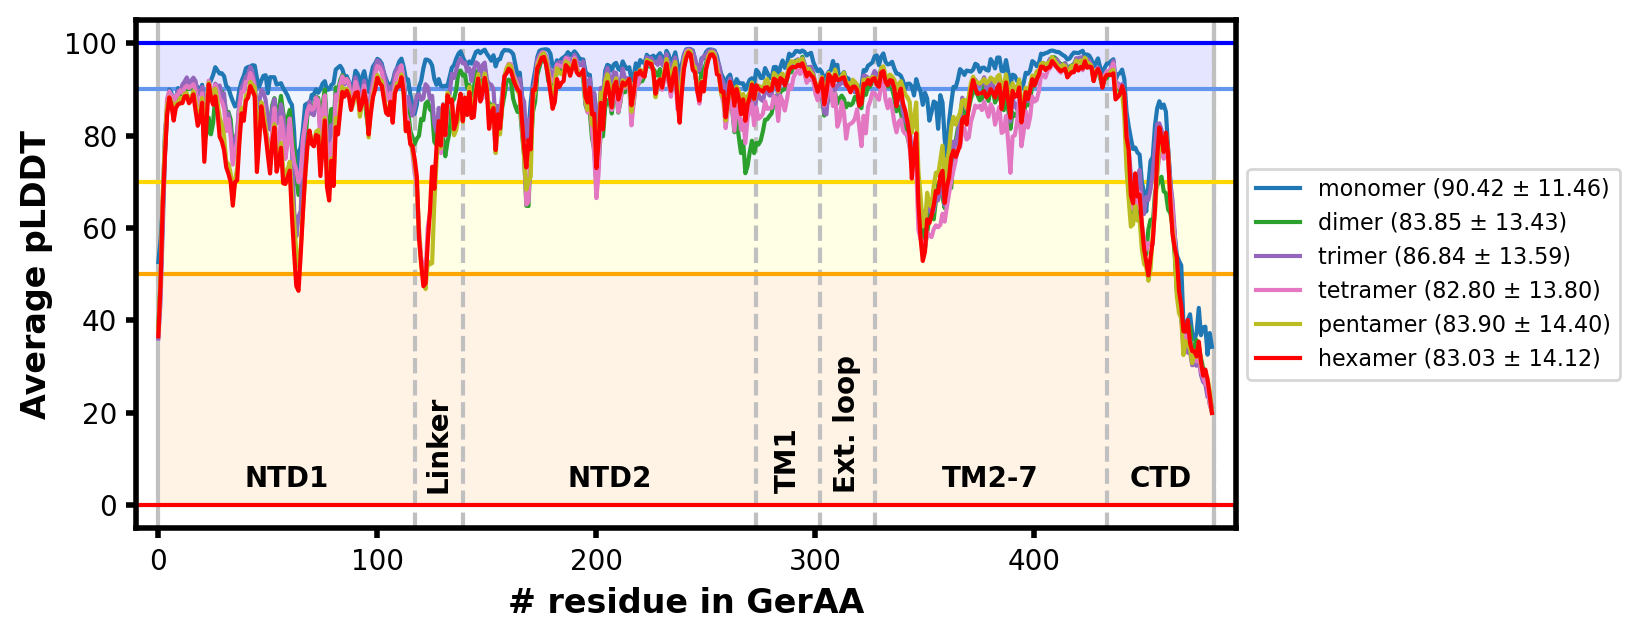

In [23]:
length = 482 #length of protein
number = [1,2,3,4,5,6]  #make number of GerAA chains per prediction
colors = plt.cm.tab10(np.linspace(0,1,6))
colors[5] = [1, 0, 0, 1]

# domains of GerAA alongside x-axis
domain_borders = [117, 139, 273, 302, 327, 433, 482] # ends of domains
names = ['NTD1', 'Linker', 'NTD2', 'TM1', 'Ext. loop', 'TM2-7', 'CTD']  # domain names
rotations = [0, 90, 0, 90, 90, 0, 0]  #label rotation values

fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
fig.set_dpi(200)

plt.vlines([0, length],-5,105, linestyle='-', 
           linewidth=1.5, color='silver') #plot boundaries for chains
plt.vlines(domain_borders,-5,105, linestyle='--', 
           linewidth=1.5, color='silver') #plot boundaries for chains
plt.hlines([0,50,70,90,100],-10,610, linestyle='-', 
           linewidth=1.5, color=['red','orange','gold','cornflowerblue','blue']) #plot boundaries for pLDDT

ax.add_patch(ptch.Rectangle((0,90),length,10, facecolor = 'blue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,70),length,20, facecolor = 'cornflowerblue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,50),length,20, facecolor = 'yellow', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,0),length,50, facecolor = 'darkorange', alpha = 0.1))

idx = 0
for i, row in metrics.iterrows():
    av_plddt = np.mean(row['pLDDT'][0:length])
    std_plddt = np.std(row['pLDDT'][0:length])
    plddt_string = f"({av_plddt:.2f} ± {std_plddt:.2f})"
    
    split_plddt = np.array_split(row['pLDDT'],number[idx])
    local_av_plddt = np.mean(split_plddt, axis = 0)
    
    ax.plot(range(0,length), local_av_plddt, linewidth=1.5, label = i+' '+plddt_string, color = colors[idx])
    idx = idx+1

domain_borders_s = [0]+domain_borders # add 0 as start of domain

for s,e,n,rot in zip(domain_borders_s,domain_borders, names, rotations): #print domain names along x-axis
    plt.text((s+e)/2, 4, n, ha='center', color='k',weight='bold', size=10, rotation=rot)
    
plt.xlabel('# residue in GerAA', fontweight = 'bold')
plt.ylabel('Average pLDDT', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

plt.ylim((-5,105))
plt.xlim((-10, length+10))

legend = plt.legend(fontsize = 8, 
                    loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [25]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_pLDDT_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pLDDT distribution (TODO)

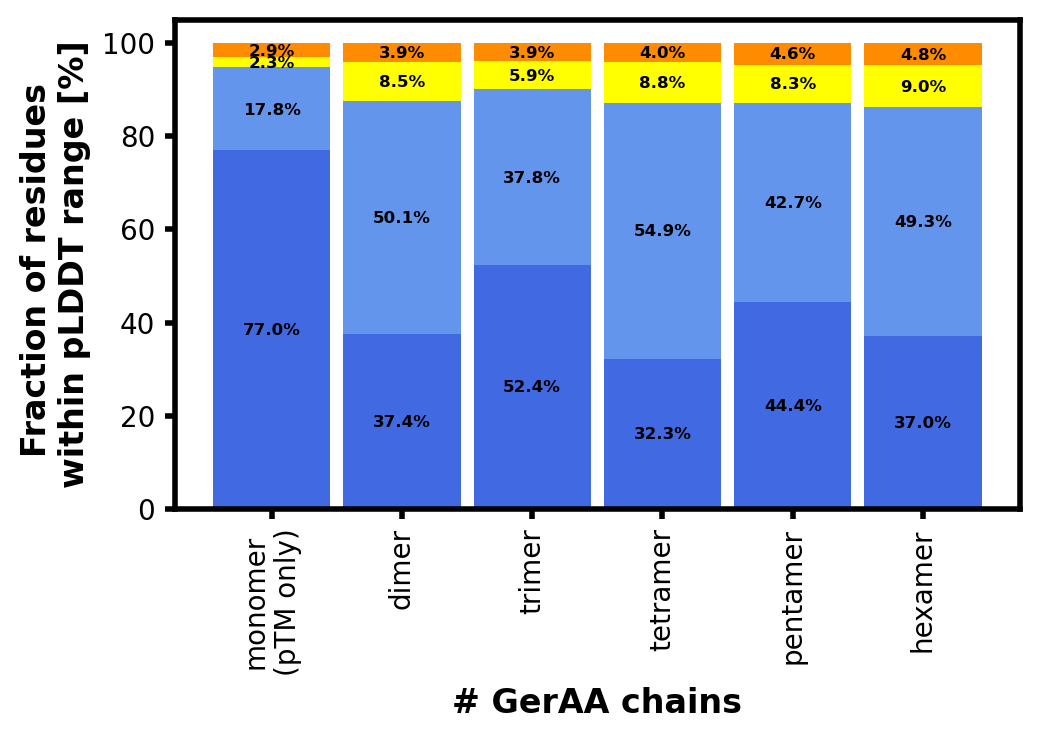

In [27]:
length = 482 #length of protein
number = list(range(1, 7)) #make number of ald chains per prediction
colors = plt.cm.tab10(np.linspace(0,1,7))
colors[5] = [1, 0, 0, 1]
width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(5,3.5)
fig.set_dpi(200)


idx = 0
vhigh = np.zeros(6)
high = np.zeros(6)
caution = np.zeros(6)
low = np.zeros(6)

for i, row in metrics.iterrows():
    # get plddt from all chains
    r = np.array(row['pLDDT'])
    
    # get the number of residues with a certain pLDDT
    vhigh[idx]=sum(r>=90)
    high[idx]=sum((r<90) & (r>=70))
    caution[idx]=sum((r<70) & (r>=50))
    low[idx]=sum(r<50)
    
    vhigh[idx] = 100*vhigh[idx]/(length*(idx+1))
    high[idx] = 100*high[idx]/(length*(idx+1))
    caution[idx] = 100*caution[idx]/(length*(idx+1))
    low[idx] = 100*low[idx]/(length*(idx+1))
    idx = idx+1
    
# plot bar charts
ax.bar(labels, vhigh, width = width, color = "royalblue", label = 'pLDDT ≥ 90')
ax.bar(labels, high, bottom = vhigh, width = width, color = "cornflowerblue", label = '70 ≤ pLDDT < 90')
ax.bar(labels, caution, bottom = vhigh+high, width = width, color = "yellow", label = '50 ≤ pLDDT < 70')
ax.bar(labels, low, bottom = vhigh+high+caution, width = width, color = "darkorange", label = 'pLDDT < 50')

for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y()- 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=6
    )
    
plt.xlabel('# GerAA chains', fontweight = 'bold')
plt.ylabel('Fraction of residues \nwithin pLDDT range [%]', fontweight = 'bold')

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#legend = plt.legend(fontsize = 8, 
#                    loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [28]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_pLDDT_distribution_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# PAE in a grid

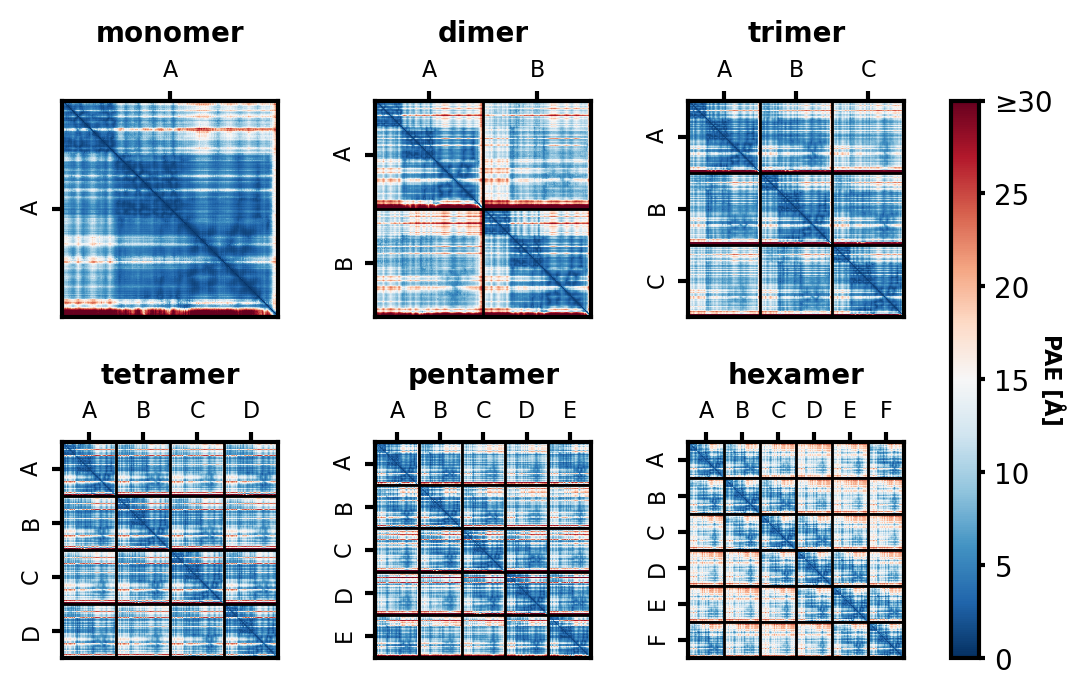

In [5]:
# get PAE and oligomeric state from metrics dataframe
PAE = metrics['PAE']
state = PAE.index.tolist()

# define axis limits by amino acid length of protein
length = 482
borders = np.arange(1,7,1)*length # get chain borders of Ald
tick_pos = (np.concatenate((np.zeros(1),borders[:-1])) + borders) / 2 # get middle point between chain borders to put labels
chainnames = list(string.ascii_uppercase) #iterable list of chain IDs

#domain_borders = np.array([117, 139, 273, 302, 327, 433]) # ends of domains, excluding last end
#domain_boundaries_all = np.tile(domain_borders,(6,1))
#domain_boundaries_all[1,:] = domain_boundaries_all[1,:] + borders[0]
#domain_boundaries_all[2,:] = domain_boundaries_all[2,:] + borders[1]
#domain_boundaries_all[3,:] = domain_boundaries_all[3,:] + borders[2]
#domain_boundaries_all[4,:] = domain_boundaries_all[4,:] + borders[3]
#domain_boundaries_all[5,:] = domain_boundaries_all[5,:] + borders[4]

fig, axes = plt.subplots(2,3, constrained_layout=True) #make 2x4 axis grid stored within 2-dimensional array
fig.set_size_inches(5.5,3.5)
fig.set_dpi(200)

i = 0
for idx_ax, ax in np.ndenumerate(axes): # iterate over all axes in array
    
    #plot domain boundaries (optional)
    #ax.vlines(domain_boundaries_all[0:i+1,:].flatten(),0,length*(i+1), linestyle='--', linewidth=.5, color='k') 
    #ax.hlines(domain_boundaries_all[0:i+1,:].flatten(),0,length*(i+1), linestyle='--', linewidth=.5, color='k')
        
    ax.set_box_aspect(1) # set to square aspect ratio
    
    mesh = ax.pcolormesh(PAE[i], vmin = 0, vmax = 30, cmap='RdBu_r') #make colored matrix with per-residue PAE color scaling
    
    ax.hlines(borders[0:i], 0, borders[i], colors = 'k', linewidth = 1) # plot borders of Ald chains
    ax.vlines(borders[0:i], 0, borders[i], colors = 'k', linewidth = 1) 
    
    # set axis labels
    ax.xaxis.tick_top() # for clarity, put on top
    ax.xaxis.set_label_position('top') 
    ax.invert_yaxis() # top left needs to map to residue 1<->1, invert
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.tick_params(width=1.5)
    
    ax.set_title(state[i], fontsize = 10, fontweight = 'bold') # set oligomeric state as axis title
    
    # set x/y-ticks to positions between Ald borders, set to respective chain name
    ax.set_xticks(tick_pos[0:i+1], labels = chainnames[0:i+1], fontsize = 8)
    ax.set_yticks(tick_pos[0:i+1], labels = chainnames[0:i+1], fontsize = 8, rotation=90)
    
    i = i + 1 # count up in list

#add colorbar next to subplot grid
cb = fig.colorbar(mesh, ax=axes, orientation='vertical')
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(size = 2, width = 1.5)

#label colorbar
cb.ax.yaxis.set_ticks([0,5,10,15,20,25,30],labels = ['0','5','10','15','20','25','≥30'])
cb.ax.set_ylabel('PAE [Å]', rotation=270, fontsize = 8, fontweight = 'bold')

#padding
fig.set_constrained_layout_pads(w_pad=0./72., h_pad=8./72.,
            hspace=0./72., wspace=0./72.)

plt.show()

In [6]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_PAE_all"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)

# Couplings with increasing multimerization state (TODO formatting)

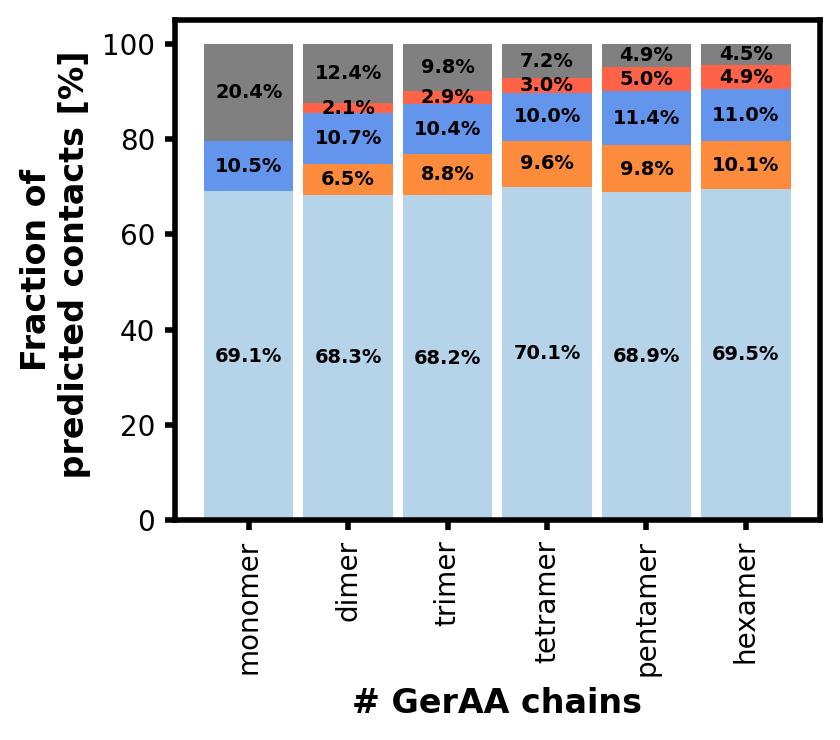

In [4]:
labels = metrics.index.tolist()

numcouplings = np.array([1,2,3,4,5,6])*456 # there are x chains (expressed as a numpy array for different oligomers), with n total significant couplings

# manually insert the coupling data and express as percentages relative to total amount of couplings

# order of oligomeric state is indicated by order of numcouplings
intra_close = np.array(
    [315,
     311+312,
     310+312+311,
     319+319+320+320,
     314*5,
     316+317+317+318+317+317])/numcouplings*100

intra_far = np.array(
    [48,
     50+48,
     51+44+47,
     46+47+45+45,
     52*4+53,
     52+49+50+49+50+51])/numcouplings*100

inter_close = np.array(
    [0,
     19+40,
     22+59+39,
     44+44+44+44,
     44+45*4,
     44+47+46+46+46+46])/numcouplings*100

inter_far = np.array(
    [0,
     8+11,
     4+20+15,
     14+14+14+13,
     22*2+23*3,
     24+22+22+22+23+22])/numcouplings*100

unsatisfied = np.array(
    [93,
     68+45,
     69+21+44,
     33+32+33+34,
     24+22*4,
     20+21+21+21+20+20])/numcouplings*100

labellist = ('Intra-chain, <5Å',
             'Homomeric, <5Å',
             'Intra-chain, 5-8Å',
             'Homomeric, 5-8Å',
             '>8Å')

width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, intra_close, width = width, color = "#B6D4E9")
ax.bar(labels, inter_close, bottom = intra_close, width = width, color = "#FC8C3B")
ax.bar(labels, intra_far, bottom = intra_close+inter_close, width = width, color = "#6495ED")
ax.bar(labels, inter_far, bottom = intra_close+inter_close+intra_far, width = width, color = "tomato")
ax.bar(labels, unsatisfied, bottom = intra_close+inter_close+intra_far+inter_far, width = width, color = "grey")

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('# GerAA chains', fontsize = 12, fontweight = 'bold')
plt.ylabel('Fraction of\n predicted contacts [%]', fontsize = 12, fontweight = 'bold')
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
plt.ylim([0, 105])

# Put a legend to the right of the current axis
#legend = plt.legend(labellist, title="456 total couplings per\nGerAA chain, P>0.9", fontsize = 5, \
#                    loc='center left', bbox_to_anchor=(1, 0.5),
#                   title_fontproperties={'weight':'bold', 'size':10})
#legend.get_title().set_fontsize('5') #legend 'Title' fontsize

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [95]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_coupling_fractions_adjusted" #no file ending!

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

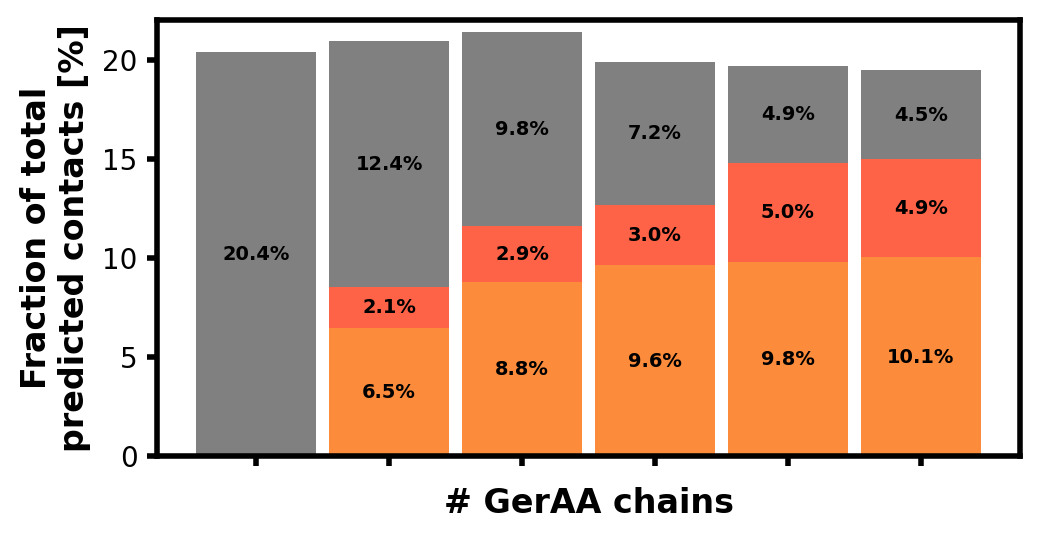

In [9]:
width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(5,2.5)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, inter_close, width = width, color = "#FC8C3B")
ax.bar(labels, inter_far, bottom = inter_close, width = width, color = "tomato")
ax.bar(labels, unsatisfied, bottom = inter_close+inter_far, width = width, color = "grey")

plt.ylim([0, 22])

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 0.3,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('# GerAA chains', fontsize = 12, fontweight = 'bold')
plt.ylabel('Fraction of total\npredicted contacts [%]', fontsize = 12, fontweight = 'bold')
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

ax.set_xticklabels([])

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [ ]:
# save the plot and coupling data
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/GerAA_hexamer/Plots"
filename = "GerAA_coupling_fractions_intermolecular_adjusted" #enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)